In [1]:
!pip install -U bitsandbytes transformers accelerate lime captum

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 16.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.0/61.0 kB 3.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.1/59.1 MB 13.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 21.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.0/18.0 MB 90.1 MB/s eta 0:00:00
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283834 sha256=9d4c3899c94ac920d1cb286589379e8ed4ce97fbf2ea312229ea0f55f89f8e67
  Stored in directory: /root/.cache/pip/wheels/e7/5d/0e/4b4fff9a47468fed5633211fb3b76d1db43fe806a17fb7486a
Successfully built lime
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source

In [1]:
from google.colab import drive, files
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os
import sys

path = os.getcwd()
while True:
    if 'utils.py' in os.listdir(path):
        if path not in sys.path:
            sys.path.append(path)
        break
    new_path = os.path.dirname(path)
    if new_path == path:
        print("utils.py not found in any parent folder. Please upload.")
        upload_utils = files.upload()
        break
    path = new_path

import utils
import numpy as np
import pandas as pd
from torch.utils.data import DataLoader
from transformers import AutoModelForCausalLM, AutoTokenizer, BitsAndBytesConfig
import torch

c:\Users\User\anaconda3\envs\nlp\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# Global Parameters of Notebook
global_params = {'dataset_type': 'scitail',
                'quantization': 'full',
                'training_mode': 'zero shot',
                'model_id': 'meta-llama/Llama-3.2-3B-Instruct'}

# Create checkpoint path
checkpoint_path = utils.create_checkpoint_path(params=global_params)

Saving to: c:\Users\User\iCloudDrive\Desktop\DAMA_EAP\NLI_Study\Notebooks\Scitail_Notebooks\Scitail_Llama_3.2_3B_Instruct\Zero-Shot\checkpoint_scitail_Llama_3.2_3B_Instruct_full_zero_shot.pt


In [4]:
utils.hf_login("HF_TOKEN")

In [6]:
tokenizer = AutoTokenizer.from_pretrained(global_params['model_id'])
model = AutoModelForCausalLM.from_pretrained(
    global_params['model_id'],
    device_map="auto",
    attn_implementation="eager"
    )

# Add padding token to the tokenizer and change padding side
tokenizer.pad_token = tokenizer.eos_token
tokenizer.padding_side = "left"

# Change the model to evaluation mode
model.eval()

tokenizer_config.json:   0%|          | 0.00/54.5k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/9.09M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/296 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/878 [00:00<?, ?B/s]

model.safetensors.index.json:   0%|          | 0.00/20.9k [00:00<?, ?B/s]

Fetching 2 files:   0%|          | 0/2 [00:00<?, ?it/s]

model-00001-of-00002.safetensors:   0%|          | 0.00/4.97G [00:00<?, ?B/s]

model-00002-of-00002.safetensors:   0%|          | 0.00/1.46G [00:00<?, ?B/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

generation_config.json:   0%|          | 0.00/189 [00:00<?, ?B/s]

LlamaForCausalLM(
  (model): LlamaModel(
    (embed_tokens): Embedding(128256, 3072)
    (layers): ModuleList(
      (0-27): 28 x LlamaDecoderLayer(
        (self_attn): LlamaAttention(
          (q_proj): Linear(in_features=3072, out_features=3072, bias=False)
          (k_proj): Linear(in_features=3072, out_features=1024, bias=False)
          (v_proj): Linear(in_features=3072, out_features=1024, bias=False)
          (o_proj): Linear(in_features=3072, out_features=3072, bias=False)
        )
        (mlp): LlamaMLP(
          (gate_proj): Linear(in_features=3072, out_features=8192, bias=False)
          (up_proj): Linear(in_features=3072, out_features=8192, bias=False)
          (down_proj): Linear(in_features=8192, out_features=3072, bias=False)
          (act_fn): SiLUActivation()
        )
        (input_layernorm): LlamaRMSNorm((3072,), eps=1e-05)
        (post_attention_layernorm): LlamaRMSNorm((3072,), eps=1e-05)
      )
    )
    (norm): LlamaRMSNorm((3072,), eps=1e-05)
    (

In [7]:
files.upload()
scitail_test = pd.read_csv('scitail_test.csv')

Saving scitail_test.csv to scitail_test.csv


In [8]:
scitail_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2126 entries, 0 to 2125
Data columns (total 4 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   premise                     2126 non-null   object
 1   hypothesis                  2126 non-null   object
 2   label                       2126 non-null   object
 3   hypothesis_graph_structure  2126 non-null   object
dtypes: object(4)
memory usage: 66.6+ KB


In [9]:
scitail_test.head(10)

,premise,hypothesis,label,hypothesis_graph_structure
0,Based on the list provided of the uses of subs...,"If a substance has a ph value greater than 7,t...",neutral,a substance<>has<>a ph value greater than 7
1,If one or two base pairs are change...,Invertebrates (and higher animals) can also be...,neutral,Invertebrates (and higher animals<>can be plac...
2,"At high temperatures, the solid dye converts i...",Gases and liquids become solids at low tempera...,neutral,Gases and liquids<>become<>solids
3,Chapter 11 Gas and Kinetic Theory .,The behavior of ideal gases is explained by ki...,neutral,The behavior of ideal gases<>is explained<>by ...
4,Both the continental crust and the oceanic cru...,Gabbro is a dark dense rock that can be found ...,neutral,Gabbro<>is<>a dark dense rock that can be foun...
5,The phylum for common marigolds is angiosperms.,Angiosperms are the most successful phylum of ...,neutral,Angiosperms<>are<>the most successful phylum o...
6,Lyme Disease is caused by a bacterium that's ...,Lyme disease is caused by bacteria.,entails,Lyme disease<>is caused<>by bacteria
7,Corolla Collective term for all the petals of ...,All of the petals together are called a corolla.,entails,All of the petals<>together are called<>a corolla
8,A polyploid is simply an organism that contain...,A(n) polyploid is an individual with more than...,entails,A(n) polyploid<>is<>an individual with more th...
9,Because type 1 diabetes is a relatively rare d...,Diabetes is unpreventable in the type one form...,neutral,Diabetes<>is<>unpreventable$$$it<>is<>of the s...


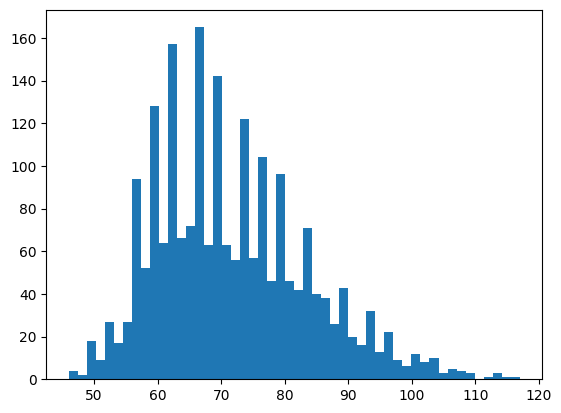

Max prompt length: 117
Max label length: 2


In [10]:
# Find the max_length for tokenization to avoid wasting computing.
utils.find_max_length(scitail_test, tokenizer=tokenizer, dataset_type=global_params['dataset_type'])

In [21]:
# Define dataset and create a dataloader.
dataset_test = utils.MyDataset(dataframe=scitail_test,
                               tokenizer=tokenizer,
                               dataset_type=global_params['dataset_type'],
                               prompt_max_length=117,
                               label_max_length=3)

batch_size = 5 # Change batch size according to GPU
dataloader = DataLoader(dataset_test, batch_size=batch_size, shuffle=False)

In [22]:
# Test
predictions, gold_labels, batch_probs = utils.test_run(model=model,
                                          dataloader=dataloader,
                                          tokenizer=tokenizer,
                                          dataset_type=global_params['dataset_type'])

for i, pair in enumerate(zip(predictions, gold_labels)):
    print(pair, batch_probs[i])

('entails', 'neutral') tensor([0.6566, 0.3434], device='cuda:0')
('neutral', 'neutral') tensor([0.1849, 0.8151], device='cuda:0')
('neutral', 'neutral') tensor([0.2234, 0.7766], device='cuda:0')
('neutral', 'neutral') tensor([0.3242, 0.6758], device='cuda:0')
('neutral', 'neutral') tensor([0.2648, 0.7352], device='cuda:0')


In [25]:
from tqdm import tqdm

# Load checkpoint if it exists
predicted_labels, gold_labels, start_batch = utils.load_checkpoint(checkpoint_path=checkpoint_path)
labels = utils.get_labels(global_params['dataset_type'])

# Loop over the batches
with torch.no_grad():
    for i, batch in enumerate(tqdm(dataloader, desc="Evaluating", unit="batch")):

        # Continue from last checkpoint
        if i < start_batch:
            continue

        input_ids_batch = batch["input_ids"].to(model.device) # Move to GPU
        attention_mask_batch = batch["attention_mask"].to(model.device) # Move to GPU
        gold_labels_batch = batch["labels"] # Keep to CPU

        batch_probs = utils.get_model_probs(batch_input_ids=input_ids_batch,
                                      batch_attention_mask=attention_mask_batch,
                                      dataset_type=global_params['dataset_type'],
                                      model=model,
                                      tokenizer=tokenizer)

        # Try to catch NaN values
        if torch.isnan(batch_probs).any():
            print("Warning: NaNs detected in batch_probs")

        batch_pred_indices = torch.argmax(batch_probs, dim=1)
        batch_pred_labels = [labels[i] for i in batch_pred_indices]

        predicted_labels.extend(batch_pred_labels)
        gold_labels.extend(gold_labels_batch)

        # Save checkpoint
        if i % 50 == 0 or i == len(dataloader) - 1:
            torch.save({"predicted_labels": predicted_labels,
                        "gold_labels": gold_labels,
                        "batch_no": i+1}, checkpoint_path)

            print(f"Checkpoint saved: {i+1}, {checkpoint_path}")

No checkpoint found.


Evaluating:   0%|          | 1/426 [00:03<25:25,  3.59s/batch]

Checkpoint saved: 1, /content/drive/MyDrive/eval_checkpoints/checkpoint_scitail_Llama_3.2_3B_Instruct_full_zero_shot.pt


Evaluating:  12%|█▏        | 51/426 [03:01<22:15,  3.56s/batch]

Checkpoint saved: 51, /content/drive/MyDrive/eval_checkpoints/checkpoint_scitail_Llama_3.2_3B_Instruct_full_zero_shot.pt


Evaluating:  24%|██▎       | 101/426 [05:58<19:11,  3.54s/batch]

Checkpoint saved: 101, /content/drive/MyDrive/eval_checkpoints/checkpoint_scitail_Llama_3.2_3B_Instruct_full_zero_shot.pt


Evaluating:  35%|███▌      | 151/426 [08:55<16:23,  3.57s/batch]

Checkpoint saved: 151, /content/drive/MyDrive/eval_checkpoints/checkpoint_scitail_Llama_3.2_3B_Instruct_full_zero_shot.pt


Evaluating:  47%|████▋     | 201/426 [11:52<13:11,  3.52s/batch]

Checkpoint saved: 201, /content/drive/MyDrive/eval_checkpoints/checkpoint_scitail_Llama_3.2_3B_Instruct_full_zero_shot.pt


Evaluating:  59%|█████▉    | 251/426 [14:49<10:23,  3.56s/batch]

Checkpoint saved: 251, /content/drive/MyDrive/eval_checkpoints/checkpoint_scitail_Llama_3.2_3B_Instruct_full_zero_shot.pt


Evaluating:  71%|███████   | 301/426 [17:46<07:21,  3.53s/batch]

Checkpoint saved: 301, /content/drive/MyDrive/eval_checkpoints/checkpoint_scitail_Llama_3.2_3B_Instruct_full_zero_shot.pt


Evaluating:  82%|████████▏ | 351/426 [20:42<04:23,  3.52s/batch]

Checkpoint saved: 351, /content/drive/MyDrive/eval_checkpoints/checkpoint_scitail_Llama_3.2_3B_Instruct_full_zero_shot.pt


Evaluating:  94%|█████████▍| 401/426 [23:39<01:27,  3.52s/batch]

Checkpoint saved: 401, /content/drive/MyDrive/eval_checkpoints/checkpoint_scitail_Llama_3.2_3B_Instruct_full_zero_shot.pt


Evaluating: 100%|██████████| 426/426 [25:05<00:00,  3.53s/batch]

Checkpoint saved: 426, /content/drive/MyDrive/eval_checkpoints/checkpoint_scitail_Llama_3.2_3B_Instruct_full_zero_shot.pt


Checkpoint found.
Accuracy: 0.5983.
 F1 Score: 0.4203.
 Matthew's Correlation Coefficient: 0.0222.
 Cohen's Kappa Score: 0.0116.


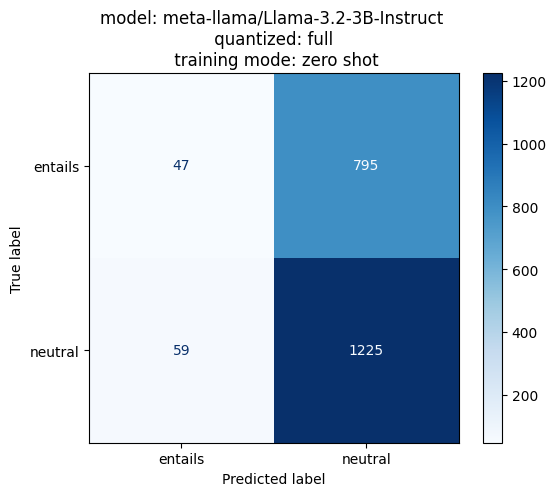

In [3]:
# Calculate metrics
predicted_labels, gold_labels, _ = utils.load_checkpoint(checkpoint_path)
utils.evaluate_metrics(predicted_labels=predicted_labels, gold_labels=gold_labels, params=global_params)

Checkpoint found.
Accuracy: 0.4967.
 F1 Score: 0.4966.
 Matthew's Correlation Coefficient: 0.0328.
 Cohen's Kappa Score: 0.0304.


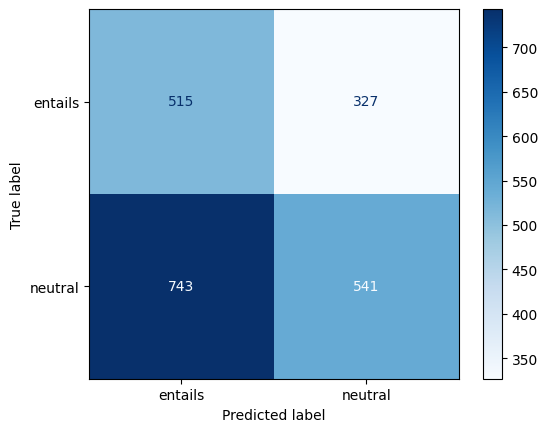

In [ ]:
# Calculate metrics
predicted_labels, gold_labels, _ = utils.load_checkpoint(checkpoint_path)
utils.evaluate_metrics(predicted_labels=predicted_labels, gold_labels=gold_labels, params=global_params)